In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on this dataset from <a href = 'https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv'>Kaggle</a>

This isnofrmation is from <a href ='https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv'> Kaggle</a>

# Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

To view the Acknowledgements, click <a href='https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv'> here</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
import seaborn as sns

In [117]:
df = pd.read_csv('creditcard.csv')

In [118]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [119]:
df.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [120]:
df.Class.unique()

array([0, 1], dtype=int64)

In [121]:
%matplotlib notebook

# As can be seen, the data set is heavily unbalanced

## So the data set needs to be resampled, but we will do it later:

<b>Our Goal: <br></b>

* Understand the little distribution of the "little" data that was provided to us.
* Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm)
* Determine the Classifiers we are going to use and decide which one has a higher accuracy.
* Create a Neural Network and compare the accuracy to our best classifier.
* Understand common mistaked made with imbalanced datasets.


## Correcting Previous Mistakes from Imbalanced Datasets:


* Never test on the oversampled or undersampled dataset.
* If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before! Because this will make data leackage.
* Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix


## Gather Sense of Our Data:

In [122]:
if(len(df)==len(df.dropna())):
    print ('There is no missing values in the data set.')
else:
    print('Please take care of the missing values first.')

There is no missing values in the data set.


### A PCA transformation has been done on the data set except for the time and amount
Keep in mind that in order to implement a PCA transformation features need to be previously scaled

In [123]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### As we can see here, Amount and Time columns contain values that are much greater than the other columns.
This means that we should scale the two columns. These columns should be scaled as the other columns.

In [124]:
df.isnull().sum().max()

0

In [125]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [126]:
counts = df.groupby('Class')['Class'].count()
counts.index = ['Normal','Fraud']

counts

Normal    284315
Fraud        492
Name: Class, dtype: int64

[284315, 492]


<IPython.core.display.Javascript object>


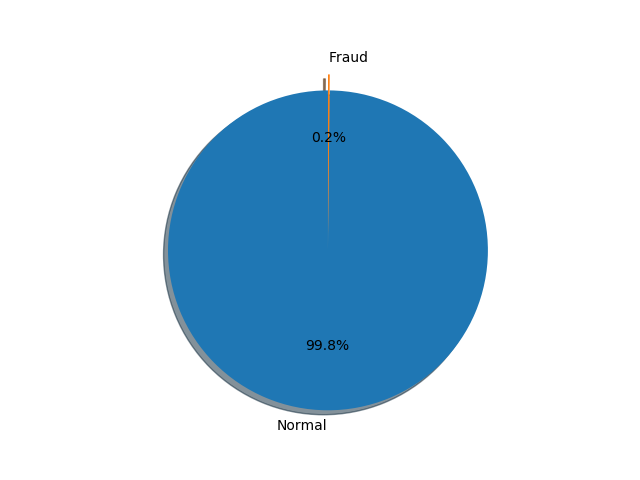

In [127]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = counts.index

print(sizes)
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Distributions:** By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

In this chart we see that the data set is heavily imbalanced, so for having a data set with 50/50 ratio of draud and non-fraud transactions, we can have a **sub-sample** of the data set.

### The issues with working with an imbalanced data set

**Overfirring:** The classification model would assume that in most cases the transaction is not fraud, but we want to be certain when a fraud occurs.<br><br>
**False Accuracy Number:** If we just use the regular accuracy number, we will get a really high number, but that is not because our model is generalizing perfectly, but instead, it is because the data set is ibmalaned, and this model will have the same accurace as of a dummy classifier that predicts the most frequent class all the time.<br><br>
**Wrong Correlation:** It is always useful to understand the relation between the predictors (features) and the results, but by having an imbalanced data set, we won't be able to see the true correlations between the class and features.

<IPython.core.display.Javascript object>


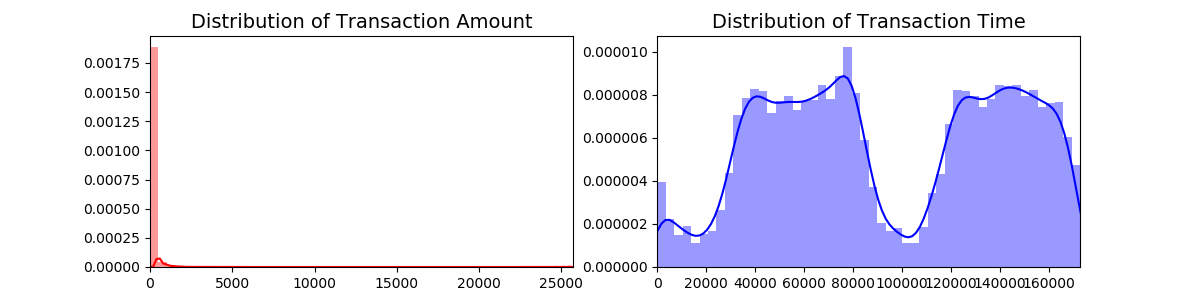

C:\Users\asghar.mohammadi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [128]:
fig, ax = plt.subplots(1,2, figsize=(12,3))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color = 'r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim(min(amount_val), max(amount_val))

sns.distplot(time_val, ax=ax[1], color = 'b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim(min(time_val), max(time_val))
  
plt.show()

<h3>Summary: </h3> 
<ul>
<li> <b>Scaled amount </b> and <b> scaled time </b> are the columns with scaled values. </li>
<li> There are <b>492 cases </b> of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe. </li>
<li>We concat the 492 cases of fraud and non fraud, <b>creating a new sub-sample. </b></li>
</ul>

In [130]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis = 1, inplace=True)

In [131]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [132]:
df['scaled_amount'].values

array([ 1.78327395, -0.26982463,  4.98372109, ...,  0.64109551,
       -0.16767973,  2.72479564])

### Splitting the Data (Original DataFrame)

We will use **train_test_split**


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

#print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
#print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
sss.split(X,y)


<generator object _BaseKFold.split at 0x000000000EA829A8>

## Random Under-Sampling:


In this phase of the project we will implement *"Random Under Sampling"* which basically consists of removing data in order to have a more <b> balanced dataset </b> and thus avoiding our models to overfitting.<br><br>

<b>1) How many instances are considered fraud transactions </b> (Fraud = "1")<br> 
<b>2) Bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio)</b><br><br>
After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. <br><br>
<b>3) Shuffle the data</b> to see if our models can maintain a certain accuracy everytime we run this script.

In [149]:
df = df.sample(frac = 1)     #Return a random sample of items from an axis of object
                            # frac = 0.5 will create a random 50% sample of the DataFrame
                            # so frac=1 will simply randomized the data frame.
        
fraud_df = df[df['Class']==1]
length = len(fraud_df)
non_fraud_df = df[df['Class']==0][:length]
print ('We are selecting', len(non_fraud_df), '''of the rows randomly so that the number of 
fraud transactions and non-fraud transactions will be the same\n''' )

normal_distributed_df = pd.concat([fraud_df,non_fraud_df])
print('After combining the fraud and non-fraud datasets, now we have', len(normal_distributed_df), 'rows of data')

We are selecting 492 of the rows randomly so that the number of 
fraud transactions and non-fraud transactions will be the same

After combining the fraud and non-fraud datasets, now we have 984 rows of data


In [150]:
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
51563,-0.027947,-0.466206,1.562782,-1.229601,-1.158630,-2.496174,0.974909,3.237633,-1.478926,0.745097,...,-0.188505,-0.263261,-0.527888,-0.006884,0.982099,0.546208,-0.191959,0.031388,0.015444,0
9487,-0.293440,-0.829650,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1
237301,0.949766,0.757598,1.655763,-0.666298,0.184900,1.822659,-0.334159,1.533334,-1.053380,0.533790,...,-0.074730,0.075141,0.167381,0.450747,-1.049683,-1.261904,2.145599,-0.102788,-0.052852,0
106679,2.868721,-0.171771,-0.440095,1.137239,-3.227080,3.242293,-2.033998,-1.618415,-3.028013,0.764555,...,0.895841,0.764187,-0.275578,-0.343572,0.233085,0.606434,-0.315433,0.768291,0.459623,1
42590,-0.233354,-0.511378,-5.932778,4.571743,-9.427247,6.577056,-6.115218,-3.661798,-10.894079,3.709210,...,1.191078,2.014272,-0.167417,0.049968,0.384430,-0.077884,0.565493,1.792012,0.371007,1


In [156]:
counts = new_df.groupby('Class')['Class'].count()
counts.index = ['Normal','Fraud']

counts

Normal    492
Fraud     492
Name: Class, dtype: int64

[492 492]


<IPython.core.display.Javascript object>


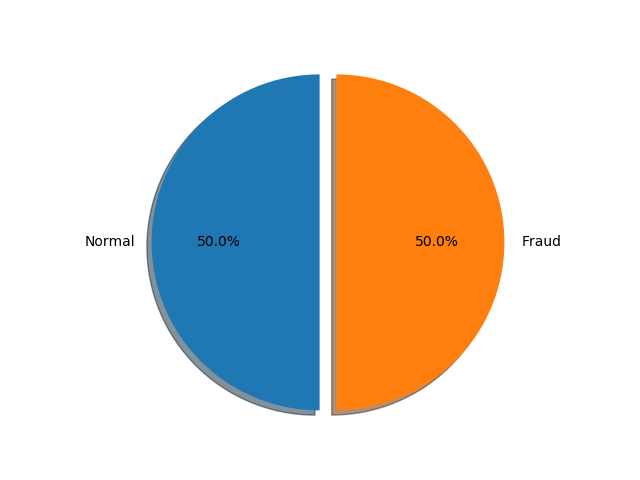

In [157]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = counts.index
sizes = counts.values
print(sizes)
#explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

<h3> Correlation Matrices </h3>
Correlation matrices are the essence of understanding our data. 

<b>We want to know if there are features that influence heavily in whether a specific transaction is a fraud. Or which features have a high positive or negative correlation with regards to fraud transactions.</b>


<ul>
<li><b>Negative Correlations: </b> features that are negatively correlated, the lower these values are, the more likely the end result will be a fraud transaction.  </li>
<li> <b> Positive Correlations: </b> features that are negatively correlated, the higher these values are, the more likely the end result will be a fraud transaction. </li>
</ul> 

<IPython.core.display.Javascript object>


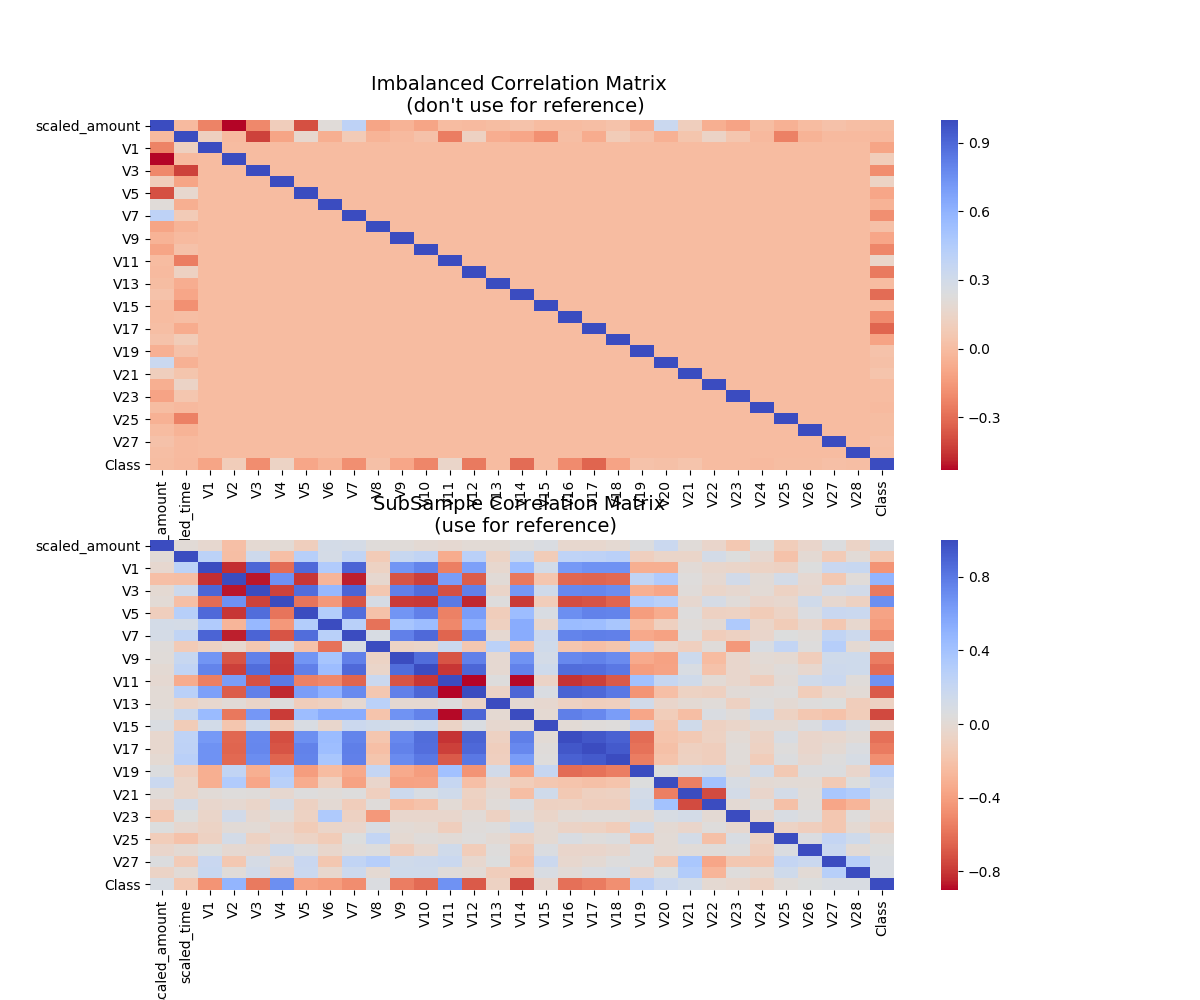

In [165]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

# Entire DataFrame
corr = df.corr()  #Compute pairwise correlation of columns, excluding NA/null values
#print (corr)
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

PCA can take four or more dimentions of data and make a 2D PCA plot

<h2>Dimensionality Reduction and Clustering: </h2>



<h3>Understanding t-SNE:  </h3>
In order to understand this algorithm you have to understand the following terms: <br>
<ul>
<li> <b> Euclidean Distance </b></li>
<li> <b>Conditional Probability</b> </li>
<li><b>Normal and T-Distribution Plots</b> </li>
</ul> 

<b>t-SNE takes a highy dimentional data set and reduces it to a low dimentional data set that retains a lot of the original information</b>